# Baseline Model

In [3]:
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator


## 1. Preprocess Data

In [4]:
# Install splitfolders library (in order to apply "train-test-split" to our data):

! pip install split-folders


In [12]:
import splitfolders

# CHECK THESE DIRECTORIES BEFORE RUNNING CELL!

raw_data_path = "../raw_data/flowers"

split_data_path =  "../raw_data/split_folder"

# Split: 80% train, 10% val and 10% test:

splitfolders.ratio(raw_data_path, output=split_data_path, seed=42, ratio=(.8, .1, .1))


In [13]:
# Preprocess the images and use batch-wise image modification:

# Train-set:

train_DataGen = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.3,
    width_shift_range = 0.2,
    height_shift_range = 0.3,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

train = train_DataGen.flow_from_directory(
    directory = split_data_path + "/train",
    batch_size = 32,
    class_mode = 'categorical',
    target_size = (128, 128),
    shuffle = True)

# Validation-set:

val_DataGen = ImageDataGenerator(rescale= 1/255.)

val = val_DataGen.flow_from_directory(
    directory = split_data_path + "/val",
    batch_size = 32,
    class_mode = "categorical",
    target_size = (128, 128))

# Test-set:

test_DataGen = ImageDataGenerator(rescale= 1/255.)

test = test_DataGen.flow_from_directory(
    directory = split_data_path + "/test",
    batch_size = 32,
    class_mode = "categorical",
    target_size = (128, 128))


Found 12586 images belonging to 16 classes.
Found 1567 images belonging to 16 classes.
Found 1587 images belonging to 16 classes.


## 2. Build CNN

In [14]:
# Instantiate model:

model = models.Sequential()

# Add 3 convolutional layers, each with max pooling:

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten, ready to pass to dense layers:

model.add(layers.Flatten())

# Add 2 dense layers, each with a bit of dropout (to combat overfitting):

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))

# Final layer (with softmax activation because its a multi-class classification):

model.add(layers.Dense(16, activation='softmax'))


In [15]:
# Compile the model (categorical crossentropy because its a multi-class classification)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# WARNING: THIS TAKES A LONG TIME. RUN ON KAGGLE/COLAB USING GPU.

#################################################################

# Fit the model with early stopping (to combat overfitting):

es = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss')

history = model.fit(train, epochs=100, validation_data=val, callbacks=es, verbose=1)


In [22]:
# Evaluate model on the test set:
model.evaluate(test)


50/50 [==============================] - 2s 35ms/step - loss: 0.8240 - accuracy: 0.7240


[0.8239738941192627, 0.7240075469017029]

## 3. Plot History of Accuracy and Loss

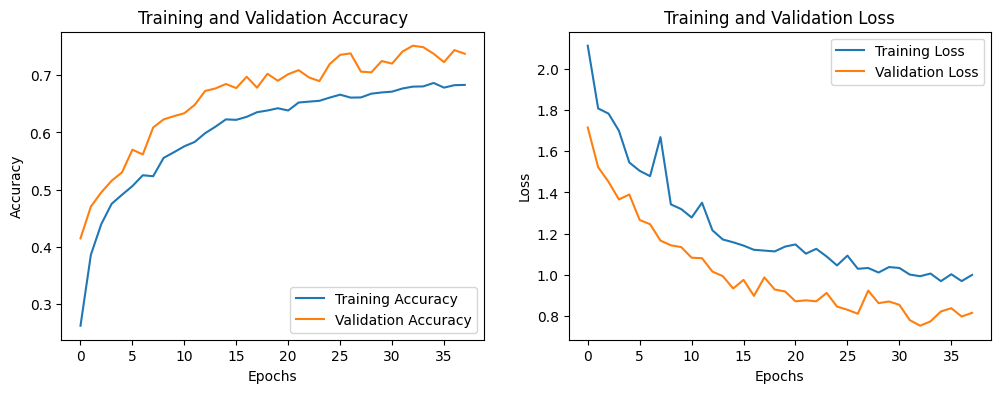

In [23]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the accuracy graph on the first subplot
ax1.plot(train_acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='best')
ax1.set_title('Training and Validation Accuracy')

# Plot the loss graph on the second subplot
ax2.plot(train_loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(loc='best')
ax2.set_title('Training and Validation Loss')

# Display the graphs
plt.show()
